In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
three = pd.read_csv('games_new_info_2023.csv')
four = pd.read_csv('games_new_info_2024.csv')
five = pd.read_csv('games_new_info_2025.csv')
data = pd.concat([three, four, five], ignore_index=True)

In [3]:
new_df = data.drop(columns=[
'playtime',
'tba',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'added_by_status',
'metacritic',
'suggestions_count',
'updated',
'id',
'score',
'clip',
'tags',
'esrb_rating',
'user_game',
'reviews_count',
'saturated_color',
'dominant_color',
'short_screenshots',
'parent_platforms',
'genres',
'community_rating',
'metacritic_url',


'slug',
'platforms',
'stores',
'background_image_additional',
'background_image',
'metacritic_platforms',
'website',
'description',
'reactions',
'screenshots_count',
'movies_count',
'parent_achievements_count',
'reddit_url',
'reddit_name',
'reddit_description',
'alternative_names',
'parents_count',
'description_raw',
'completion_ratio',
'platforms_count',
'genres_count',
'developers_count',
'publishers_count',
'additions',
'series_games',
'reddit_logo',
'rating_ratio',
'name_original',
'creators_count',
'game_series_count'
])
new_df


,name,released,ratings,achievements_count,reddit_count,twitch_count,youtube_count,additions_count,developers,publishers,series_count,achievements
0,Baldur's Gate III,2023-08-03,"[{'id': 5, 'title': 'exceptional', 'count': 69...",25,4018,151,584102,0,"[{'id': 4056, 'name': 'Larian Studios', 'slug'...","[{'id': 3678, 'name': 'Larian Studios', 'slug'...",2,"[{'id': 1768551, 'name': 'Foehammer', 'descrip..."
1,Hogwarts Legacy,2023-02-10,"[{'id': 4, 'title': 'recommended', 'count': 40...",98,1335,126,1000000,0,"[{'id': 3751, 'name': 'Avalanche Software', 's...","[{'id': 350, 'name': 'Warner Bros. Interactive...",10,"[{'id': 1723569, 'name': 'Trophy Triumph', 'de..."
2,Barotrauma,2023-03-13,"[{'id': 4, 'title': 'recommended', 'count': 99...",69,1153,178,61440,0,"[{'id': 108309, 'name': 'FakeFish', 'slug': 'f...","[{'id': 29965, 'name': 'FakeFish', 'slug': 'fa...",0,"[{'id': 1707772, 'name': 'Some men just want t..."
3,Atomic Heart,2023-02-21,"[{'id': 4, 'title': 'recommended', 'count': 26...",203,302,10,179564,2,"[{'id': 24949, 'name': 'Mundfish', 'slug': 'mu...","[{'id': 57019, 'name': 'Focus Entertainment', ...",1,"[{'id': 1852321, 'name': 'Water Sports', 'desc..."
4,Resident Evil 4,2023-03-24,"[{'id': 5, 'title': 'exceptional', 'count': 40...",101,0,100,0,0,"[{'id': 3678, 'name': 'Capcom', 'slug': 'capco...","[{'id': 2150, 'name': 'Capcom', 'slug': 'capco...",10,"[{'id': 1734402, 'name': 'Skilled Agent', 'des..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,The Deep Creep,2025-03-26,[],0,0,0,0,0,"[{'id': 462570, 'name': 'WUT Studio', 'slug': ...","[{'id': 84759, 'name': 'WUT Studio', 'slug': '...",0,[]
2996,qualia,2025-03-13,[],0,0,0,0,0,"[{'id': 462142, 'name': 'CMY2K', 'slug': 'cmy2...","[{'id': 84400, 'name': 'CMY2K', 'slug': 'cmy2k...",0,[]
2997,Doodle Empires,2025-05-30,"[{'id': 1, 'title': 'skip', 'count': 1, 'perce...",0,0,0,0,0,"[{'id': 464987, 'name': 'Turtle Stack Games', ...","[{'id': 86839, 'name': 'Turtle Stack Games', '...",0,[]
2998,Underquest,2025-04-23,[],0,0,0,0,0,"[{'id': 463628, 'name': 'Otherside Bay Studio'...","[{'id': 85677, 'name': 'Otherside Bay Studio',...",0,[]


In [4]:
import re
new_df['ratings'] = new_df['ratings'].fillna('')
new_df['ratings'] = new_df['ratings'].apply(lambda x: {title: int(count) for title, count in re.findall(r"'title':\s*'([^']*)',[^}]*'count':\s*(\d+)", x)})

In [5]:
import re
new_df['developers'] = new_df['developers'].fillna('')
new_df['developers'] = new_df['developers'].apply(lambda x: re.findall(r"'name':\s*'([^']*)'", x))
new_df['developers'] = new_df['developers'].apply(lambda lst: ', '.join(lst))

In [6]:
import re
new_df['publishers'] = new_df['publishers'].fillna('')
new_df['publishers'] = new_df['publishers'].apply(lambda x: re.findall(r"'name':\s*'([^']*)'", x))
new_df['publishers'] = new_df['publishers'].apply(lambda lst: ', '.join(lst))

In [7]:
import re
new_df['achievements'] = new_df['achievements'].apply(lambda x: [float(percent) for percent in re.findall(r"'percent':\s*'([\d.]+)'", x)])
new_df['achievements'] = new_df['achievements'].apply(lambda lst: ', '.join(map(str, lst)))

In [8]:
new_df.to_csv('new_data.csv', index=False)

In [9]:
df = pd.read_csv('new_data.csv')

In [10]:
df.head()

,name,released,ratings,achievements_count,reddit_count,twitch_count,youtube_count,additions_count,developers,publishers,series_count,achievements
0,Baldur's Gate III,2023-08-03,"{'exceptional': 690, 'recommended': 152, 'skip...",25,4018,151,584102,0,Larian Studios,Larian Studios,2,"2.07, 5.75, 5.87, 5.87, 6.79, 8.17, 11.85, 14...."
1,Hogwarts Legacy,2023-02-10,"{'recommended': 409, 'exceptional': 259, 'meh'...",98,1335,126,1000000,0,"Avalanche Software, Portkey Games","Warner Bros. Interactive, Wizarding World",10,"0.2, 8.12, 11.25, 11.25, 11.54, 11.97, 11.97, ..."
2,Barotrauma,2023-03-13,"{'recommended': 99, 'meh': 44, 'exceptional': ...",69,1153,178,61440,0,"FakeFish, Undertow Games",FakeFish,0,"0.11, 0.11, 0.21, 0.21, 0.21, 0.21, 0.64, 0.86..."
3,Atomic Heart,2023-02-21,"{'recommended': 269, 'exceptional': 185, 'meh'...",203,302,10,179564,2,Mundfish,Focus Entertainment,1,"0.27, 0.27, 1.34, 1.61, 1.61, 1.61, 1.61, 1.61..."
4,Resident Evil 4,2023-03-24,"{'exceptional': 402, 'recommended': 151, 'meh'...",101,0,100,0,0,Capcom,Capcom,10,"11.11, 12.7, 12.7, 13.1, 13.49, 13.49, 13.89, ..."


In [11]:
rdf = pd.read_csv('ready_.csv')

In [12]:
import numpy as np
rdf = rdf.replace(0.00, np.nan)
rdf.head()

,name,platforms,stores,released,rating,ratings_count,added,suggestions_count,genres,metacritic_publisher,age_rating,metacritic_final
0,Counter-Strike,"PC, macOS, Linux, Xbox",Steam,2000-11-01,4.05,1633.0,9283,500.0,"Shooter, Action",Microsoft Game Studios,Mature,74.0
1,Deus Ex: Game of the Year Edition,"PC, macOS, PlayStation 3, PlayStation 2","Steam, GOG",2000-06-22,4.12,572.0,5893,422.0,"Shooter, Action, RPG",NaN,Mature,90.0
2,Jet Set Radio,"PC, iOS, Android, Xbox 360, PlayStation 3, PS ...","Steam, PlayStation Store, Xbox 360 Store",2000-06-29,3.41,508.0,5304,348.0,"Platformer, Action, Sports",NaN,Teen,94.0
3,Ricochet,"PC, macOS, Linux",Steam,2000-11-01,2.38,265.0,4508,141.0,"Indie, Action",NaN,NaN,93.0
4,Hitman: Codename 47,PC,"Steam, GOG",2000-11-19,3.83,597.0,3969,489.0,"Shooter, Action",Eidos Interactive,Mature,73.0


In [13]:
rdf['released'] = pd.to_datetime(rdf['released'])
filt_df = rdf[rdf['released'].dt.year.isin([2023, 2024, 2025])]
filt_df = filt_df.reset_index(drop=True)
filt_df

,name,platforms,stores,released,rating,ratings_count,added,suggestions_count,genres,metacritic_publisher,age_rating,metacritic_final
0,Baldur's Gate III,"PC, PlayStation 5, Xbox Series S/X, macOS","Steam, PlayStation Store, GOG",2023-08-03,4.43,938.0,4501,581.0,"Strategy, Adventure, RPG",Larian Studios Games,Mature,96.0
1,Hogwarts Legacy,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...","Steam, PlayStation Store, Xbox Store, Nintendo...",2023-02-10,3.93,851.0,3589,914.0,"Action, RPG",Warner Bros. Interactive Entertainment,Teen,84.0
2,Barotrauma,"PC, macOS, Linux","Steam, GOG",2023-03-13,3.78,189.0,2222,270.0,"Strategy, Indie, Action, Simulation",Daedalic Entertainment,NaN,81.0
3,Atomic Heart,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...","Steam, PlayStation Store",2023-02-21,3.86,586.0,2156,673.0,"Shooter, Adventure, Action",Focus Entertainment,Mature,70.0
4,Resident Evil 4,"PC, PlayStation 5, PlayStation 4, Xbox Series ...","Steam, PlayStation Store",2023-03-24,4.61,554.0,2100,535.0,"Adventure, Action",Capcom,Mature,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,The Deep Creep,PC,Steam,2025-03-26,NaN,NaN,1,162.0,Indie,WUT Studio,NaN,97.0
2996,qualia,"PC, macOS",Steam,2025-03-13,NaN,NaN,1,NaN,Indie,NaN,NaN,NaN
2997,Doodle Empires,"PC, macOS, Linux",Steam,2025-05-30,NaN,1.0,1,286.0,"Strategy, Indie, Simulation",NaN,NaN,94.0
2998,Underquest,PC,Steam,2025-04-23,NaN,NaN,1,215.0,"Adventure, Action, RPG, Casual, Strategy, Indie",Otherside Bay Studio,NaN,87.0


In [14]:
df = df.drop('released', axis=1)

In [15]:
mdf = df.merge(filt_df, on='name', how='left')
mdf

,name,ratings,achievements_count,reddit_count,twitch_count,youtube_count,additions_count,developers,publishers,series_count,...,stores,released,rating,ratings_count,added,suggestions_count,genres,metacritic_publisher,age_rating,metacritic_final
0,Baldur's Gate III,"{'exceptional': 690, 'recommended': 152, 'skip...",25,4018,151,584102,0,Larian Studios,Larian Studios,2,...,"Steam, PlayStation Store, GOG",2023-08-03,4.43,938.0,4501,581.0,"Strategy, Adventure, RPG",Larian Studios Games,Mature,96.0
1,Hogwarts Legacy,"{'recommended': 409, 'exceptional': 259, 'meh'...",98,1335,126,1000000,0,"Avalanche Software, Portkey Games","Warner Bros. Interactive, Wizarding World",10,...,"Steam, PlayStation Store, Xbox Store, Nintendo...",2023-02-10,3.93,851.0,3589,914.0,"Action, RPG",Warner Bros. Interactive Entertainment,Teen,84.0
2,Barotrauma,"{'recommended': 99, 'meh': 44, 'exceptional': ...",69,1153,178,61440,0,"FakeFish, Undertow Games",FakeFish,0,...,"Steam, GOG",2023-03-13,3.78,189.0,2222,270.0,"Strategy, Indie, Action, Simulation",Daedalic Entertainment,NaN,81.0
3,Atomic Heart,"{'recommended': 269, 'exceptional': 185, 'meh'...",203,302,10,179564,2,Mundfish,Focus Entertainment,1,...,"Steam, PlayStation Store",2023-02-21,3.86,586.0,2156,673.0,"Shooter, Adventure, Action",Focus Entertainment,Mature,70.0
4,Resident Evil 4,"{'exceptional': 402, 'recommended': 151, 'meh'...",101,0,100,0,0,Capcom,Capcom,10,...,"Steam, PlayStation Store",2023-03-24,4.61,554.0,2100,535.0,"Adventure, Action",Capcom,Mature,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,The Deep Creep,{},0,0,0,0,0,WUT Studio,WUT Studio,0,...,Steam,2025-03-26,NaN,NaN,1,162.0,Indie,WUT Studio,NaN,97.0
2996,qualia,{},0,0,0,0,0,CMY2K,CMY2K,0,...,Steam,2025-03-13,NaN,NaN,1,NaN,Indie,NaN,NaN,NaN
2997,Doodle Empires,{'skip': 1},0,0,0,0,0,Turtle Stack Games,Turtle Stack Games,0,...,Steam,2025-05-30,NaN,1.0,1,286.0,"Strategy, Indie, Simulation",NaN,NaN,94.0
2998,Underquest,{},0,0,0,0,0,Otherside Bay Studio,Otherside Bay Studio,0,...,Steam,2025-04-23,NaN,NaN,1,215.0,"Adventure, Action, RPG, Casual, Strategy, Indie",Otherside Bay Studio,NaN,87.0


In [16]:
mdf.isna().sum()

,0
name,0
ratings,0
achievements_count,0
reddit_count,0
twitch_count,0
youtube_count,0
additions_count,0
developers,81
publishers,80
series_count,0


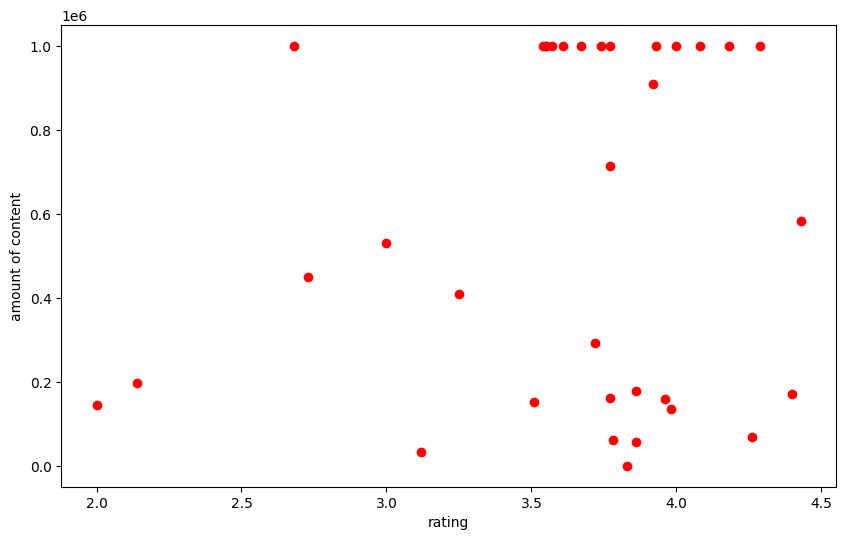

In [17]:
plt.figure(figsize=(10, 6))

filtered_data = mdf[mdf['youtube_count'] > 0]

plt.scatter(filtered_data['rating'], filtered_data['youtube_count'],
           color='red')

plt.xlabel('rating')
plt.ylabel('amount of content')
plt.show()

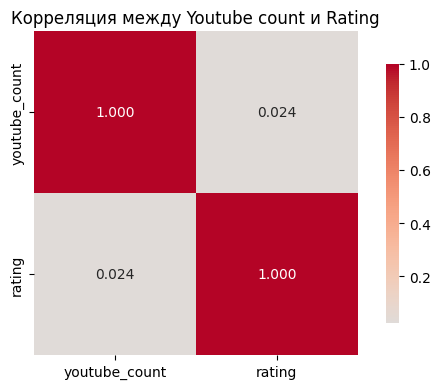

In [18]:
corr_matrix = mdf[['youtube_count', 'rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Youtube count и Rating')
plt.tight_layout()
plt.show()

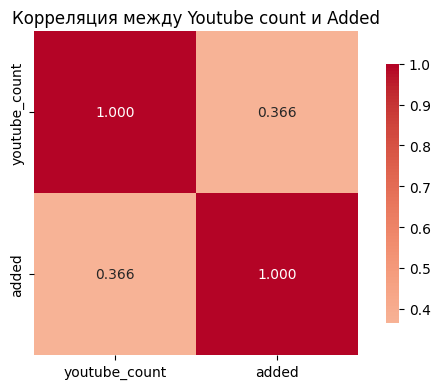

In [19]:
corr_matrix = mdf[['youtube_count', 'added']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Youtube count и Added')
plt.tight_layout()
plt.show()

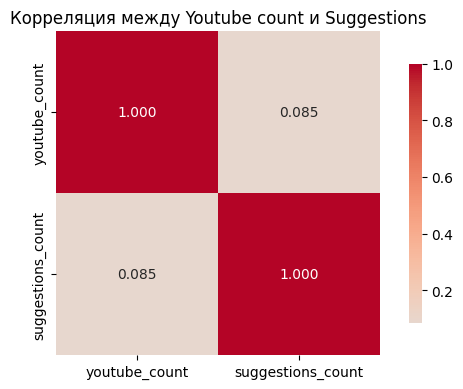

In [20]:
corr_matrix = mdf[['youtube_count', 'suggestions_count']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Youtube count и Suggestions')
plt.tight_layout()
plt.show()

In [21]:
mdf['youtube_count'].value_counts()

,count
youtube_count,
0,2960
1000000,18
61440,1
584102,1
179564,1
408598,1
171148,1
58281,1
197308,1


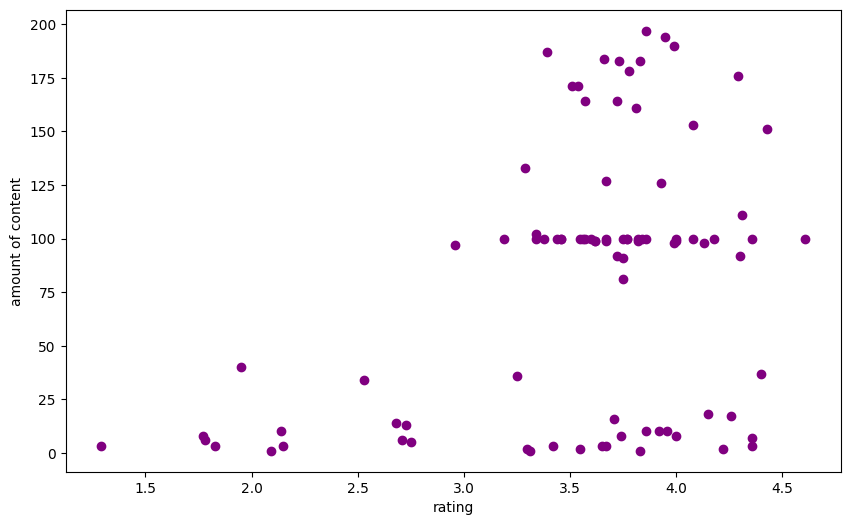

In [22]:
plt.figure(figsize=(10, 6))

filtered_data = mdf[mdf['twitch_count'] > 0]

plt.scatter(filtered_data['rating'], filtered_data['twitch_count'],
           color='purple')

plt.xlabel('rating')
plt.ylabel('amount of content')
plt.show()

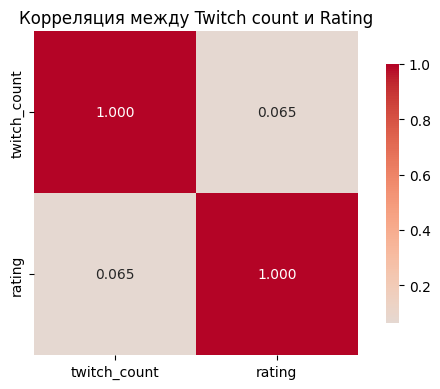

In [23]:
corr_matrix = mdf[['twitch_count', 'rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Twitch count и Rating')
plt.tight_layout()
plt.show()

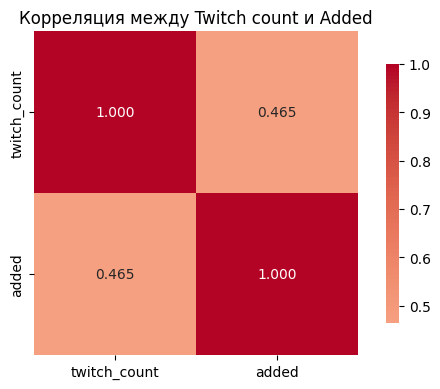

In [34]:
corr_matrix = mdf[['twitch_count', 'added']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Twitch count и Added')
plt.tight_layout()
plt.show()

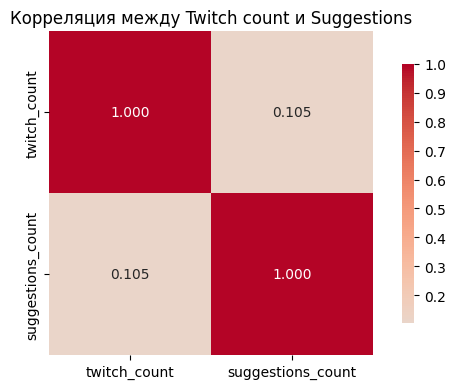

In [24]:
corr_matrix = mdf[['twitch_count', 'suggestions_count']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Twitch count и Suggestions')
plt.tight_layout()
plt.show()

In [25]:
mdf['twitch_count'].value_counts()

,count
twitch_count,
0,2906
100,23
3,7
99,5
1,4
10,4
2,3
8,3
5,3


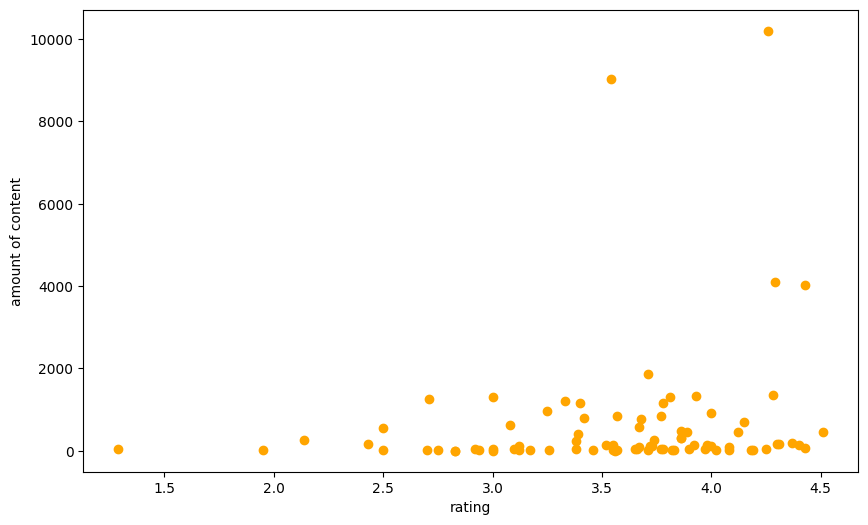

In [26]:
plt.figure(figsize=(10, 6))

filtered_data = mdf[mdf['reddit_count'] > 0]

plt.scatter(filtered_data['rating'], filtered_data['reddit_count'],
           color='orange')

plt.xlabel('rating')
plt.ylabel('amount of content')
plt.show()

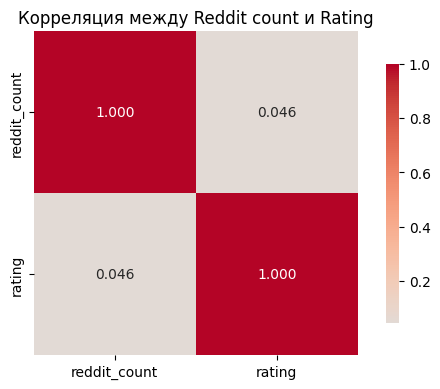

In [27]:
corr_matrix = mdf[['reddit_count', 'rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Reddit count и Rating')
plt.tight_layout()
plt.show()

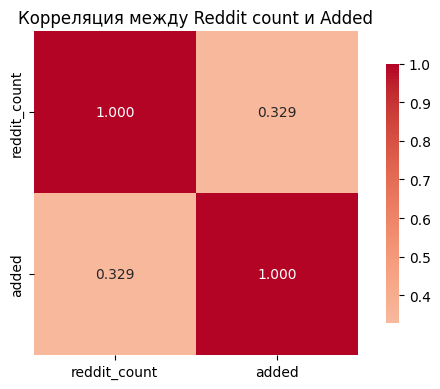

In [28]:
corr_matrix = mdf[['reddit_count', 'added']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Reddit count и Added')
plt.tight_layout()
plt.show()

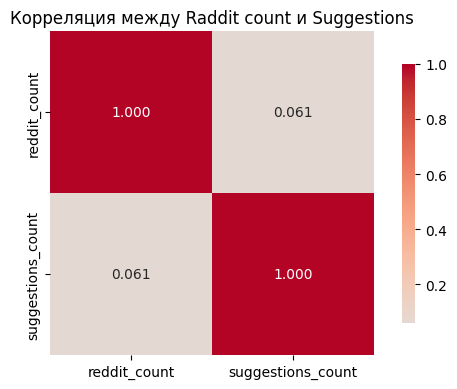

In [29]:
corr_matrix = mdf[['reddit_count', 'suggestions_count']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между Raddit count и Suggestions')
plt.tight_layout()
plt.show()

In [30]:
mdf['reddit_count'].value_counts()

,count
reddit_count,
0,2896
27,21
26,4
105,2
52,2
...,...
194,1
9034,1
3,1


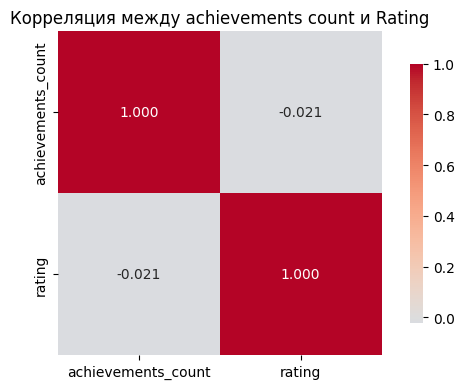

In [31]:
corr_matrix = mdf[['achievements_count', 'rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между achievements count и Rating')
plt.tight_layout()
plt.show()

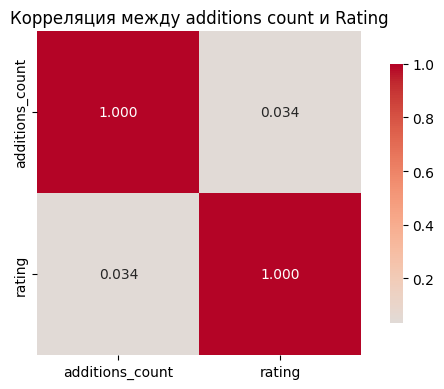

In [32]:
corr_matrix = mdf[['additions_count', 'rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Корреляция между additions count и Rating')
plt.tight_layout()
plt.show()

In [33]:
mdf.to_csv('fin.csv', index=False)